<h2>This program estimates the paramters of the logistic m growth model of Algae using least square method.</h2>
<h3>This is the project work of CM 3rd year/1st sem students (Sikkum Rai, Bishwas Adhikari, Allen Maharjan) </h3>

r = 0.03871303606923002
a1 = -0.0322874020437245
value of k = 1.1990136591604286
SStot=  1.6125049166666667
SSreg=  1.5341724267015522
SSres=  0.07101307693221191
Rsquare=  0.9514218597689353


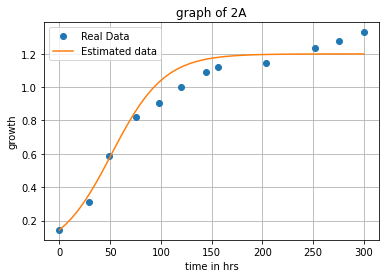

In [6]:
#importing packages for mathematical calculations and graph plotting

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


def findr(conc,time,k,r):
    p0 = conc[0]
    fi,tot,reg,res = [],[],[],[]
    average = np.mean(conc)
    for i in range (0,len(time)):
        fi.append((p0*k)/(p0+(k-p0)*np.exp(-r*time[i])))
        tot.append((conc[i]-average)**2)
    for i in range(0,len(time)):
        reg.append((fi[i]-average)**2)
        res.append((conc[i]-fi[i])**2)
    SSreg = np.sum(reg)
    SStot = np.sum(tot)
    SSres = np.sum(res)
    print ('SStot= ',SStot)
    print ('SSreg= ',SSreg)
    print ('SSres= ',SSres)
    Rsq = (SSreg/SStot)
    print ('Rsquare= ',Rsq)
    
    
def findp(conc,k,r,time,ratio,file_name):
    p0 = conc[0]
    p= []
    t = np.linspace(0,time[len(time)-1],50)
    for i in range (0, len(t)):
        p.append((p0*k)/(p0+(k-p0)*np.exp(-r*t[i])))
    findr(conc,time,k,r)
    plotting(t,p,conc,time,ratio,file_name)
    

def plotting(x,y,conc,time,ratio,file_name):
    plt.title("graph of {}".format(file_name))
    plt.plot(time,conc,'o',label = 'Real Data')
    plt.grid()
    plt.plot(x,y,label = 'Estimated data')
    plt.xlabel('time in hrs')
    plt.ylabel('growth')
    plt.legend()
    plt.show()
        

def calculation(data,file_name):
    pt,ratio,xsq,xy,R,K = [],[],[],[],[],[]
    time = (data['hour']) #time extracted from given data
    if (time[1]==1.23): #changing hrs into min
        time = time*24
    conc=(data['abs']) #concentration extrtacted from given data
    for i in range (1,len(time)):
        pt.append((conc[i]-conc[i-1])/(time[i]-time[i-1]))#correction
    for i in range (0,(len(time)-1)):
        ratio.append(pt[i]/conc[i+1]) #read
    xsq = np.power(conc,2)
    for i in range (0,(len(time)-1)):
        xy.append(conc[i+1]*ratio[i])
    sumx= np.sum(conc)
    sumy= np.sum(ratio)
    sumx2 = np.sum(xsq)
    sumy2 = np.sum(xy)
    a0 = ((sumy * sumx2) - (sumx * sumy2))/(((len(time)-1)*sumx2) - (sumx**2))
    print('r =', a0)
    a1 = (((len(time)-1)*sumy2)-(sumx*sumy))/(((len(time)-1)*sumx2)-(sumx**2))
    print('a1 =',a1)
    k = -a0/a1
    print("value of k =",k)
    R.append(a0)
    K.append(k)
    findp(conc,k,a0,time,ratio,file_name)
    
    
def main(file_name):
    data = pd.read_csv("{}.csv".format(file_name))
    calculation(data,file_name)
    
    
    
main("2A")

r = 0.028714551241224094
a1 = -0.016897746863459472
value of k = 1.6993124274643898
SStot=  3.626755666666667
SSreg=  4.156142986254502
SSres=  0.14358680902596985
Rsquare=  0.9604090205619118


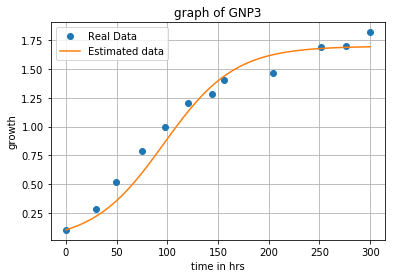

In [30]:
main('GNP3')

r = 0.02604593330481321
a1 = -0.016691106515791396
value of k = 1.5604677425173248
SStot=  2.8667802499999997
SSreg=  3.2677509089739516
SSres=  0.1079031134186094
Rsquare=  0.9623608703811151


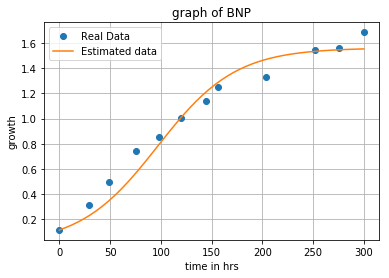

In [31]:
main('BNP')

r = 0.0222692778730761
a1 = -0.010133584017200407
value of k = 2.1975717411803144
SStot=  5.441405666666666
SSreg=  6.2690402066119315
SSres=  0.1710524409766656
Rsquare=  0.9685646593077024


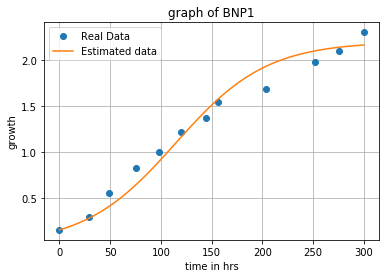

In [32]:
main('BNP1')

r = 0.055348548698830595
a1 = -0.03950078104774248
value of k = 1.4012013745230445
SStot=  1.9757927272727274
SSreg=  1.450045533581767
SSres=  0.2527400614533146
Rsquare=  0.8720816925962762


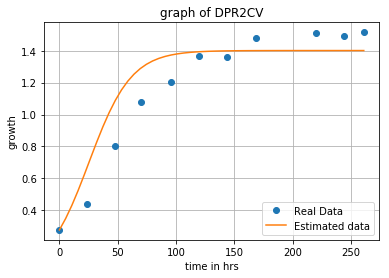

In [33]:
main('DPR2CV')

r = 0.022474924880501426
a1 = -0.01301906408828236
value of k = 1.7263087982437764
SStot=  2.8318836363636364
SSreg=  3.1095337495887154
SSres=  0.15423688226311325
Rsquare=  0.9455355861792522


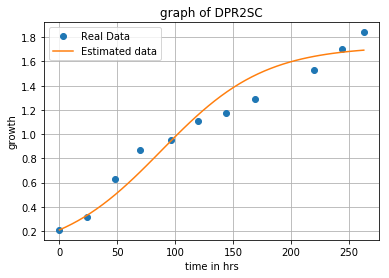

In [34]:
main('DPR2SC')

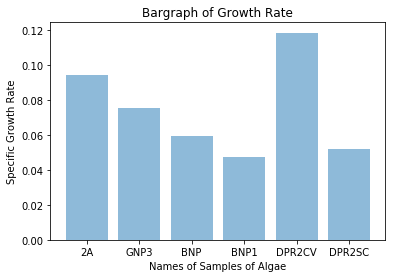

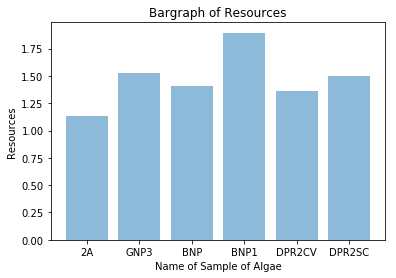

In [16]:
objects = ('2A','GNP3','BNP','BNP1','DPR2CV','DPR2SC')
y_pos = np.arange(len(objects))

plt.bar(y_pos, R, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Specific Growth Rate')
plt.xlabel('Names of Samples of Algae')
plt.title('Bargraph of Growth Rate')
plt.show()
plt.bar(y_pos, K, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Resources')
plt.xlabel('Name of Sample of Algae')
plt.title('Bargraph of Resources')

plt.show()